# Download Vessel Counts by Day


In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors,colorbar
%matplotlib inline
import csv 
import math
from math import radians, cos, sin, asin, sqrt
from scipy import stats
import math
import cPickle 

In [10]:
import bq  
client = bq.Client.Get()

In [11]:
def Query(q):
    t0 = time.time()
    answer = client.ReadTableRows(client.Query(q)['configuration']['query']['destinationTable'])
    print 'Query time: ' + str(time.time() - t0) + ' seconds.'
    return answer

In [4]:
def query_date(thedate):
    q = '''
    SELECT
      integer(FLOOR(first_lat*10)) lat_bin,
      integer(FLOOR(first_lon*10)) lon_bin,
      integer(FLOOR(avg_lat*10)) lat_bin_avg,
      integer(FLOOR(avg_lon*10)) lon_bin_avg,
      satellite_positions sat_positions,
      terrestrial_positions terrestrial_positions,
      positions_weighted,
      avg_speed,
      slow_pings,
      mmsi
    FROM
    (SELECT
      mmsi,
      SUM( CASE WHEN speed = 0 OR (speed<=2 AND type IN (18, 19)) THEN 180 
         WHEN (speed > 0 AND speed <14 AND type IN (1,2,3)AND turn = 0 )
             OR (speed>2 AND type IN (18,19)) THEN 10 
          when speed>0 and speed<14 and type in (1,2,3) and turn !=0 then 3.3
          when speed>=14 and speed<23 and type in (1,2,3) and turn = 0 then 6
          when type in (1,2,3) and (speed>=23 or (speed>=14 and turn !=0)) then 2
          END) positions_weighted,
       first(lat) first_lat,
       first(lon) first_lon,
       avg(lat) avg_lat,
       avg(lon) avg_lon,
       max(lat) max_lat,
       min(lat) min_lat,
       max(lon) max_lon,
       min(lon) min_lon,
       avg(speed) avg_speed,
       sum(if( (speed=0 and type in (1,2,3)) or (speed<2 and type in (18,19)),1,0 )) slow_pings,
       sum( if(REGEXP_REPLACE(tagblock_station, 'u', '') IN ('rORBCOMM000',
            'rORBCOMM01',
            'rORBCOMM008',
            'rORBCOMM009',
            'rORBCOMM010'),1,0)) terrestrial_positions,
       sum( if(REGEXP_REPLACE(tagblock_station, 'u', '') not IN ('rORBCOMM000',
            'rORBCOMM01',
            'rORBCOMM008',
            'rORBCOMM009',
            'rORBCOMM010'),1,0)) satellite_positions,       
    FROM
      [pipeline_normalize.'''+thedate+''']
    WHERE
      type IN (1,2,3,18,19) and lat is not null and lon is not null and speed is not null and turn is not null
    group by mmsi
    )
      where
      max_lat - min_lat <5
      AND (max_lon - min_lon < 10
        OR first_lon > 170
        OR first_lon < -170)
      AND mmsi IN (select mmsi from
    [scratch_david_gapanalysis.good_mmsi_2015_1000pings])
    '''
    print q
#     positions = Query(q)
#     cPickle.dump(positions, open('../../data/density/'+thedate+'_v2_vessels.p', 'wb')) 

In [5]:
query_date('20130701')


    SELECT
      integer(FLOOR(first_lat*10)) lat_bin,
      integer(FLOOR(first_lon*10)) lon_bin,
      integer(FLOOR(avg_lat*10)) lat_bin_avg,
      integer(FLOOR(avg_lon*10)) lon_bin_avg,
      satellite_positions sat_positions,
      terrestrial_positions terrestrial_positions,
      positions_weighted,
      avg_speed,
      slow_pings,
      mmsi
    FROM
    (SELECT
      mmsi,
      SUM( CASE WHEN speed = 0 OR (speed<=2 AND type IN (18, 19)) THEN 180 
         WHEN (speed > 0 AND speed <14 AND type IN (1,2,3)AND turn = 0 )
             OR (speed>2 AND type IN (18,19)) THEN 10 
          when speed>0 and speed<14 and type in (1,2,3) and turn !=0 then 3.3
          when speed>=14 and speed<23 and type in (1,2,3) and turn = 0 then 6
          when type in (1,2,3) and (speed>=23 or (speed>=14 and turn !=0)) then 2
          END) positions_weighted,
       first(lat) first_lat,
       first(lon) first_lon,
       avg(lat) avg_lat,
       avg(lon) avg_lon,
       max(lat) max_lat,
 

In [15]:
for i in range(1,32):
    thedate = "201503"
    if i<10:
        thedate += "0"+str(i)
    else:
        thedate += str(i)
    print thedate
    query_date(thedate)
    

20150301
Waiting on bqjob_rc5d1d36a0673555_00000153a58cea75_85 ... (14s) Current status: DONE   
Query time: 34.4649701118 seconds.
20150302
Waiting on bqjob_r129120c3ab62cee1_00000153a58d78fb_86 ... (15s) Current status: DONE   
Query time: 52.4378290176 seconds.
20150303
Waiting on bqjob_r1fd315b1681a4fad_00000153a58e54d4_87 ... (15s) Current status: DONE   
Query time: 46.6302821636 seconds.
20150304
Waiting on bqjob_r50de679d8e60065a_00000153a58f19ae_88 ... (23s) Current status: DONE   
Query time: 59.0982401371 seconds.
20150305
Waiting on bqjob_r4240430d55b85765_00000153a5900f9c_89 ... (15s) Current status: DONE   
Query time: 47.1999361515 seconds.
20150306
Waiting on bqjob_r2e32496f8d58ab02_00000153a590d7dc_90 ... (14s) Current status: DONE   
Query time: 47.9087018967 seconds.
20150307
Waiting on bqjob_r4b5766a43c5a75f1_00000153a591a1c4_91 ... (14s) Current status: DONE   
Query time: 45.9500920773 seconds.
20150308
Waiting on bqjob_recf75325fc14252_00000153a5926412_92 ... (9s

In [3]:
import csv
for i in range(1,32):
    thedate = "201501"
    if i<10:
        thedate += "0"+str(i)
    else:
        thedate += str(i)
    print thedate   
    positions = cPickle.load(open('../../data/density/'+thedate+'_v2_vessels.p', 'rb'))
    with open('../../data/density/'+thedate+'_v2_vessels.csv', 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["lat_bin","lon_bin","lat_bin_avg","lon_bin_avg","sat_positions",
                         "terrestrial_positions","positions_weighted",
                        "avg_speed","slow_pings","mmsi"])
        writer.writerows(positions)

20150101
20150102
20150103
20150104
20150105
20150106
20150107
20150108
20150109
20150110
20150111
20150112
20150113
20150114
20150115
20150116
20150117
20150118
20150119
20150120
20150121
20150122
20150123
20150124
20150125
20150126
20150127
20150128
20150129
20150130
20150131


In [5]:
for i in range(1,29):
    thedate = "201502"
    if i<10:
        thedate += "0"+str(i)
    else:
        thedate += str(i)
    print thedate   
    positions = cPickle.load(open('../../data/density/'+thedate+'_v2_vessels.p', 'rb'))
    with open('../../data/density/'+thedate+'_v2_vessels.csv', 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["lat_bin","lon_bin","lat_bin_avg","lon_bin_avg","sat_positions",
                         "terrestrial_positions","positions_weighted",
                        "avg_speed","slow_pings","mmsi"])
        writer.writerows(positions)

20150201
20150202
20150203
20150204
20150205
20150206
20150207
20150208
20150209
20150210
20150211
20150212
20150213
20150214
20150215
20150216
20150217
20150218
20150219
20150220
20150221
20150222
20150223
20150224
20150225
20150226
20150227
20150228


In [4]:
for i in range(1,31):
    thedate = "201503"
    if i<10:
        thedate += "0"+str(i)
    else:
        thedate += str(i)
    print thedate   
    positions = cPickle.load(open('../../data/density/'+thedate+'_v2_vessels.p', 'rb'))
    with open('../../data/density/'+thedate+'_v2_vessels.csv', 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["lat_bin","lon_bin","lat_bin_avg","lon_bin_avg","sat_positions",
                         "terrestrial_positions","positions_weighted",
                        "avg_speed","slow_pings","mmsi"])
        writer.writerows(positions)

20150301
20150302
20150303
20150304
20150305
20150306
20150307
20150308
20150309
20150310
20150311
20150312
20150313
20150314
20150315
20150316
20150317
20150318
20150319
20150320
20150321
20150322
20150323
20150324
20150325
20150326
20150327
20150328
20150329
20150330


In [6]:
# for i in range(31,32):
#     thedate = "201503"
#     if i<10:
#         thedate += "0"+str(i)
#     else:
#         thedate += str(i)
#     print thedate   
#     positions = cPickle.load(open('../../data/density/'+thedate+'_v2_vessels.p', 'rb'))
#     with open('../../data/density/'+thedate+'_v2_vessels.csv', 'wb') as f:
#         writer = csv.writer(f)
#         writer.writerow(["lat_bin","lon_bin","lat_bin_avg","lon_bin_avg","sat_positions",
#                          "terrestrial_positions","positions_weighted",
#                         "avg_speed","slow_pings","mmsi"])
#         writer.writerows(positions)

20150331


In [6]:
from math import radians, cos, sin, asin, sqrt
%matplotlib inline
from matplotlib import colors,colorbar
from mpl_toolkits.basemap import Basemap
import bq  
import csv 
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from IPython.core.display import display, HTML

client = bq.Client.Get()

In [8]:
def makeMap(grid,fig_title,bar_title,fig_min_value,fig_max_value,colormap='vidris',
           map_width=10, map_height=6):
    fig = plt.figure(figsize=(map_width,map_height)) 
    
    firstlat = max_lat
    lastlat =  min_lat
    firstlon = min_lon
    lastlon = max_lon
    scale = cellsize

    numlats = int((firstlat-lastlat)/scale+.5)
    numlons = int((lastlon-firstlon)/scale+.5)

    lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
    lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

    extra = 0
    m = Basemap(llcrnrlat=lastlat-extra, urcrnrlat=firstlat+extra,
              llcrnrlon=firstlon-extra, urcrnrlon=lastlon+extra, lat_ts=0, projection='mill',resolution="h")

    m.drawmapboundary()#fill_color='#111111')
    m.fillcontinents('#cccccc',lake_color='#cccccc')#, lake_color, ax, zorder, alpha)

    x = np.linspace(firstlon, lastlon, -(firstlon-lastlon)*one_over_cellsize+1)
    y = np.linspace(lastlat, firstlat, (firstlat-lastlat)*one_over_cellsize+1)
    x, y = np.meshgrid(x, y)
    converted_x, converted_y = m(x, y)
    from matplotlib import colors,colorbar

    maximum = fig_max_value # grid.max()
    minimum = fig_min_value #1

    norm = colors.LogNorm(vmin=minimum, vmax=maximum)
    # norm = colors.Normalize(vmin=0, vmax=1000)

    m.pcolormesh(converted_x, converted_y, grid, norm=norm, vmin=minimum, vmax=maximum, cmap = colormap)

    t = fig_title
    plt.title(t, color = "#000000", fontsize=18)

    ax = fig.add_axes([0.2, 0.1, 0.65, 0.02]) #x coordinate , 
    norm = colors.LogNorm(vmin=minimum, vmax=maximum)
    # norm = colors.Normalize(vmin=0, vmax=1000)
    lvls = np.logspace(np.log10(minimum),np.log10(maximum),num=6)
    cb = colorbar.ColorbarBase(ax,norm = norm, orientation='horizontal', ticks=lvls, cmap = colormap)

    #cb.ax.set_xticklabels(["0" ,round(m3**.5,1), m3, round(m3**1.5,1), m3*m3,round(m3**2.5,1), str(round(m3**3,1))+"+"], fontsize=10)
    
    cb.ax.set_xticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
    cb.set_label(bar_title,labelpad=-40, y=0.45, color = "#000000")
    plt.savefig(fig_title+".png",bbox_inches='tight',dpi=300,transparent=True,pad_inches=.1)
    plt.show()

In [29]:
max_lat = 10
min_lat = -40
max_lon = 170
min_lon = 80

In [33]:
q = '''
    SELECT 
    integer(floor(lat)) lat_bin,
    integer(floor(lon)) lon_bin,
    count(distinct mmsi) distinct_mmsi,
    count(*) pings
    from (
    select mmsi,lat, lon, seg_id from TABLE_DATE_RANGE([pipeline_classify_logistic_715.],  
         TIMESTAMP("2015-01-01"), TIMESTAMP("2015-01-01"))
       where lat > '''+str(min_lat)+'''
       AND lat <'''+str(max_lat)+''' and 
       lon > '''+str(min_lon)+'''
       and lon < '''+str(max_lon)+'''
    )
    where 
#        mmsi not in (412437961,412437962,412420502,412420503,412420576,412420574,412420789,412420871,
#       900025357,900025393,413322650,414203586,412211196,412440255,412440256,412440257,412440258,412440259,
#       412440261,150200162,412440077,412440078,412420805,412420421,412440377,412425706,412447093,412211691,
#       412420276,412420917,411041815, 525018188, 412420276,412420561,533180156)
#          AND 
         seg_id NOT IN (
         SELECT seg_id
            FROM
              [scratch_david_seg_analysis.2015_segments_posonly] WHERE
                   (terrestrial_positions = point_count and point_count< 20)
              OR ((min_lon >= 0 // these are almost definitely noise
                  AND max_lon <= 0.109225)
                OR (min_lat >= 0
                  AND max_lat <= 0.109225))
      )
    group by lat_bin, lon_bin
    //having pings > 20
    '''
print q
pings_per_day = Query(q)


    SELECT 
    integer(floor(lat)) lat_bin,
    integer(floor(lon)) lon_bin,
    count(distinct mmsi) distinct_mmsi,
    count(*) pings
    from (
    select mmsi,lat, lon, seg_id from TABLE_DATE_RANGE([pipeline_classify_logistic_715.],  
         TIMESTAMP("2015-01-01"), TIMESTAMP("2015-01-01"))
       where lat > -40
       AND lat <10 and 
       lon > 80
       and lon < 170
    )
    where 
#        mmsi not in (412437961,412437962,412420502,412420503,412420576,412420574,412420789,412420871,
#       900025357,900025393,413322650,414203586,412211196,412440255,412440256,412440257,412440258,412440259,
#       412440261,150200162,412440077,412440078,412420805,412420421,412440377,412425706,412447093,412211691,
#       412420276,412420917,411041815, 525018188, 412420276,412420561,533180156)
#          AND 
         seg_id NOT IN (
         SELECT seg_id
            FROM
              [scratch_david_seg_analysis.2015_segments_posonly] WHERE
                   (terrestrial_positions = p

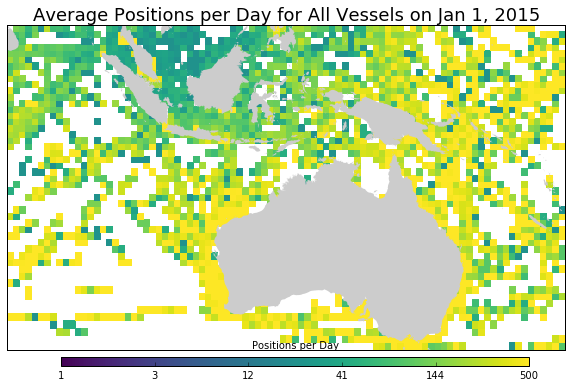

In [34]:
cellsize = 1
one_over_cellsize = 1

num_lats = (max_lat-min_lat)*one_over_cellsize
num_lons = (max_lon-min_lon)*one_over_cellsize

grid = np.zeros(shape=(num_lats,num_lons))

for row in pings_per_day:
    lat = int(row[0])
    lon = int(row[1])
    lat_index = lat-min_lat #*one_over_cellsize
    lon_index = lon-min_lon #*one_over_cellsize
    grid[lat_index][lon_index] = 24*float(row[3])/float(row[2]) # divides by area in square km

    
makeMap(grid,"Average Positions per Day for All Vessels on Jan 1, 2015","Positions per Day",1,500.1, colormap=plt.get_cmap("viridis"))


In [57]:
def make_ping_count(thedate):

    q = '''
        SELECT 
        integer(floor(lat)) lat_bin,
        integer(floor(lon)) lon_bin,
        count(distinct mmsi) distinct_mmsi,
        count(*) pings
        from (
        select mmsi,lat, lon, seg_id from [pipeline_classify_logistic_715.'''+str(thedate)+''']
           where lat > '''+str(min_lat)+'''
           AND lat <'''+str(max_lat)+''' and 
           lon > '''+str(min_lon)+'''
           and lon < '''+str(max_lon)+'''
        )
    #    where 
    #        mmsi not in (412437961,412437962,412420502,412420503,412420576,412420574,412420789,412420871,
    #       900025357,900025393,413322650,414203586,412211196,412440255,412440256,412440257,412440258,412440259,
    #       412440261,150200162,412440077,412440078,412420805,412420421,412440377,412425706,412447093,412211691,
    #       412420276,412420917,411041815, 525018188, 412420276,412420561,533180156)
    #          AND 
#              seg_id NOT IN (
#              SELECT seg_id
#                 FROM
#                   [scratch_david_seg_analysis.2015_segments_posonly] WHERE
#                        (terrestrial_positions = point_count and point_count< 20)
#                   OR ((min_lon >= 0 // these are almost definitely noise
#                       AND max_lon <= 0.109225)
#                     OR (min_lat >= 0
#                       AND max_lat <= 0.109225))
#           )
        group by lat_bin, lon_bin
        //having pings > 20
        '''
#     print q
    pings_per_day = Query(q)

    cellsize = 1
    one_over_cellsize = 1

    num_lats = (max_lat-min_lat)*one_over_cellsize
    num_lons = (max_lon-min_lon)*one_over_cellsize

    grid = np.zeros(shape=(num_lats,num_lons))

    for row in pings_per_day:
        lat = int(row[0])
        lon = int(row[1])
        lat_index = lat-min_lat*one_over_cellsize
        lon_index = lon-min_lon*one_over_cellsize
        grid[lat_index][lon_index] = 24*float(row[3])/float(row[2]) # divides by area in square km

    cPickle.dump(pings_per_day, open('../../data/density/'+str(thedate)+'_csiro_region_pos.p', 'wb')) 
    cPickle.dump(grid, open('../../data/density/'+str(thedate)+'_csiro_region_pos_grid.p', 'wb')) 
    makeMap(grid,"Average Positions per Day for All Vessels on "+str(thedate),"Positions per Day",1,500.1, colormap=plt.get_cmap("viridis"))


Waiting on bqjob_r435f0d1ed88ca0ab_0000015776d0081e_28 ... (0s) Current status: DONE   
Query time: 1.1658821106 seconds.


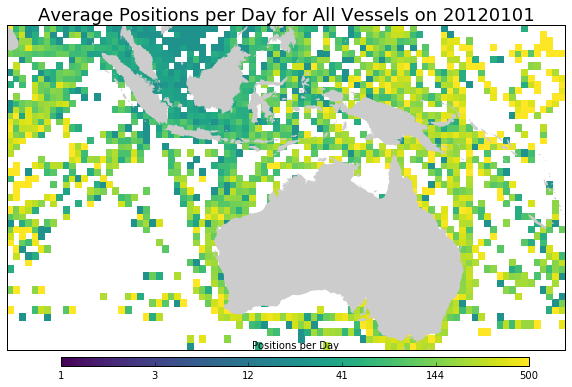

Waiting on bqjob_r656fa744dc3f890a_0000015776d042fa_29 ... (0s) Current status: DONE   
Query time: 2.67158985138 seconds.


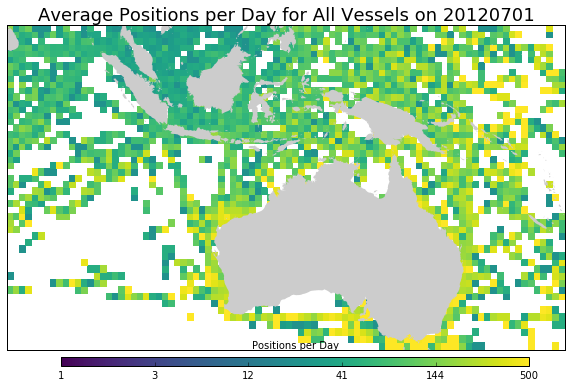

Waiting on bqjob_r7d91225bc99644d5_0000015776d08384_30 ... (0s) Current status: DONE   
Query time: 26.9606099129 seconds.


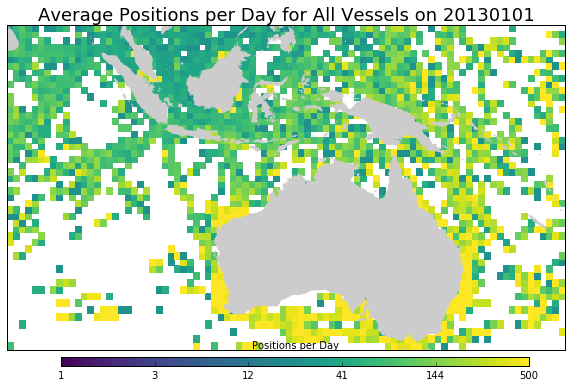

Waiting on bqjob_r50283f109d4a17a6_0000015776d12528_31 ... (1s) Current status: DONE   
Query time: 6.48297095299 seconds.


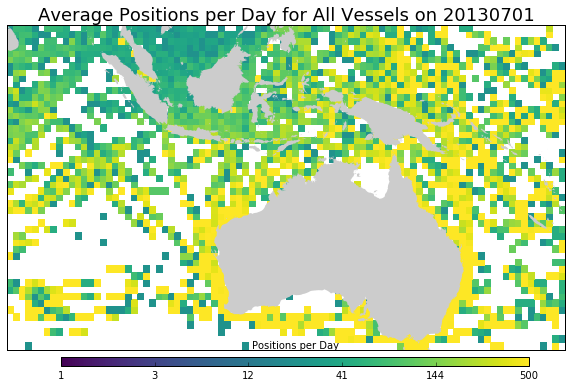

Waiting on bqjob_r6586b8fd323c1269_0000015776d17613_32 ... (0s) Current status: DONE   
Query time: 4.28571510315 seconds.


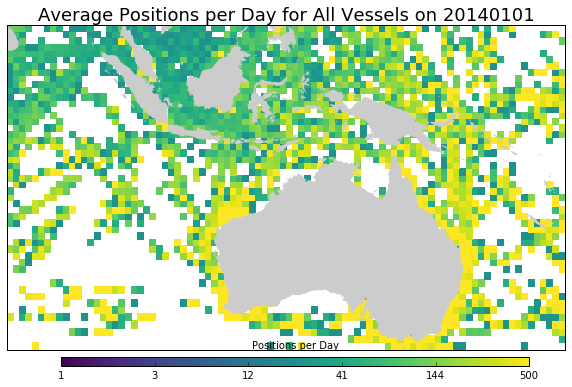

Waiting on bqjob_r46077af77e5484d_0000015776d1bf73_33 ... (0s) Current status: DONE   
Query time: 2.6659078598 seconds.


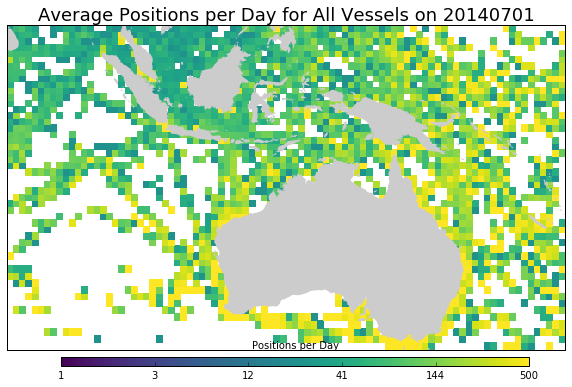

Waiting on bqjob_r289f66a696066a7f_0000015776d201be_34 ... (0s) Current status: DONE   
Query time: 4.25015187263 seconds.


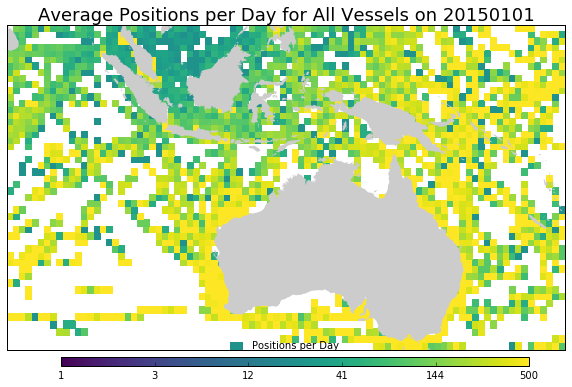

Waiting on bqjob_rda21b3f6fd84816_0000015776d24c6d_35 ... (1s) Current status: DONE   
Query time: 3.69055891037 seconds.


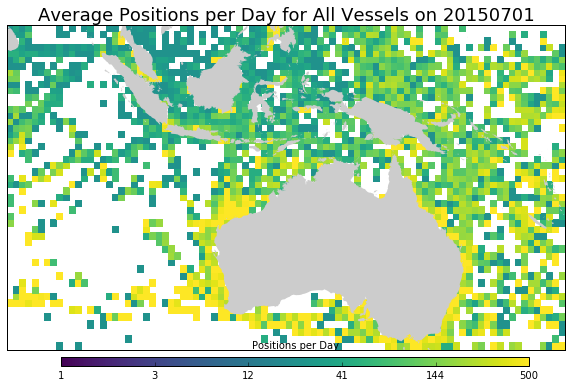

Waiting on bqjob_r3adfce5c77e478f5_0000015776d294e8_36 ... (0s) Current status: DONE   
Query time: 2.52114796638 seconds.


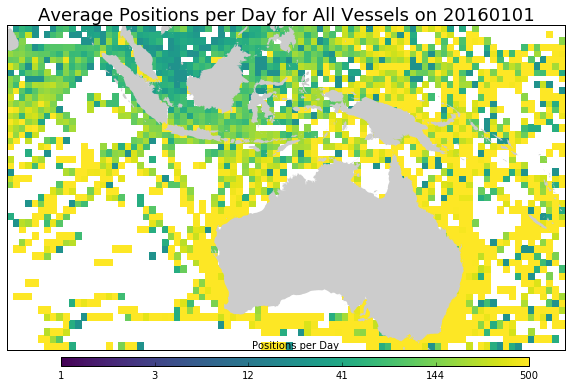

In [58]:
make_ping_count(20120101)
make_ping_count(20120701)
make_ping_count(20130101)
make_ping_count(20130701)
make_ping_count(20140101)
make_ping_count(20140701)
make_ping_count(20150101)
make_ping_count(20150701)
make_ping_count(20160101)

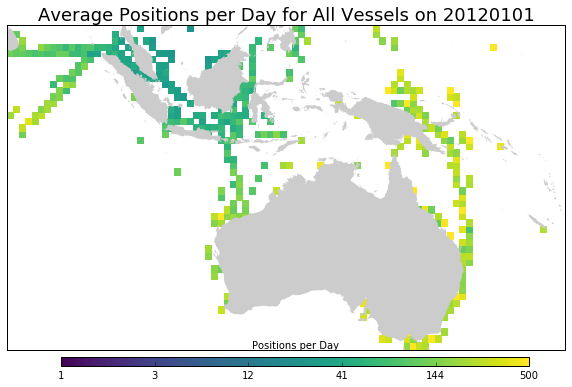

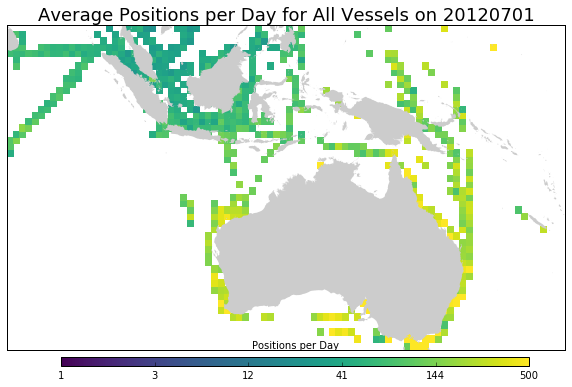

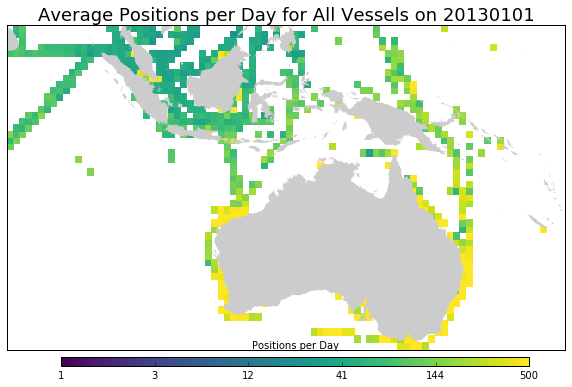

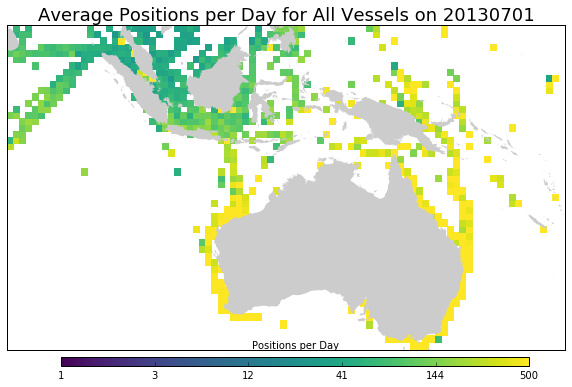

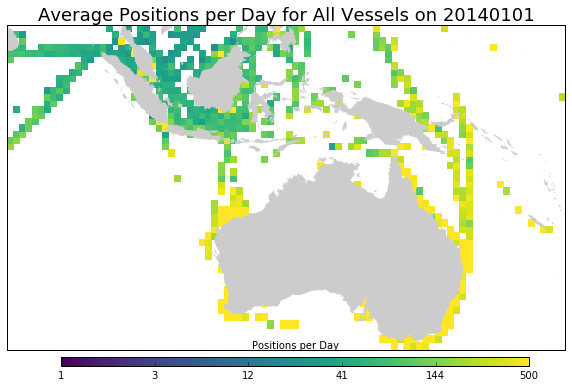

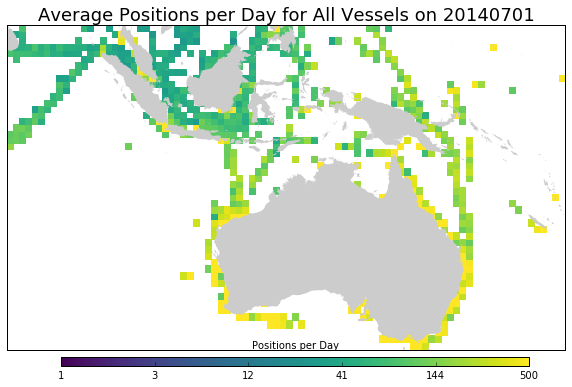

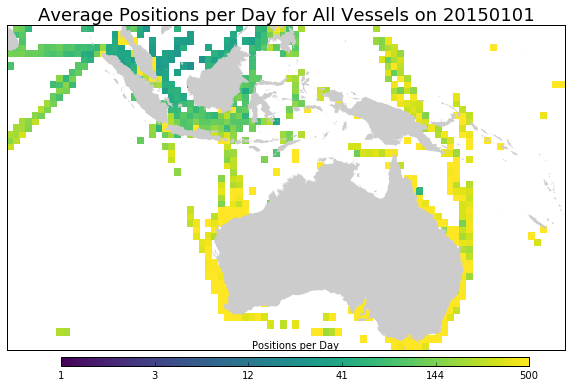

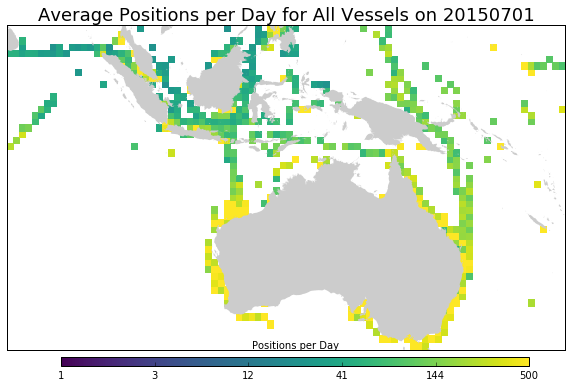

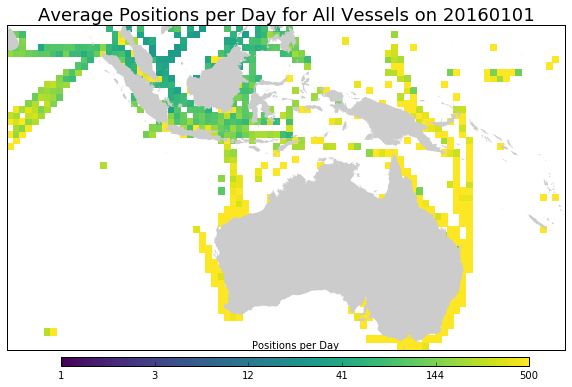

In [61]:
thedates = [20120101, 20120701, 20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

for thedate in thedates:
#     grid = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos_grid.p', 'rb'))
    pos = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos.p', 'rb'))
    grid = np.zeros(shape=(num_lats,num_lons))

    for row in pos:
        if int(row[2])> 5:
            lat = int(row[0])
            lon = int(row[1])
            lat_index = lat-min_lat*one_over_cellsize
            lon_index = lon-min_lon*one_over_cellsize
            grid[lat_index][lon_index] = 24*float(row[3])/float(row[2]) # divides by area in square km

    makeMap(grid,"Average Positions per Day for All Vessels on "+str(thedate),"Positions per Day",1,500.1, colormap=plt.get_cmap("viridis"))


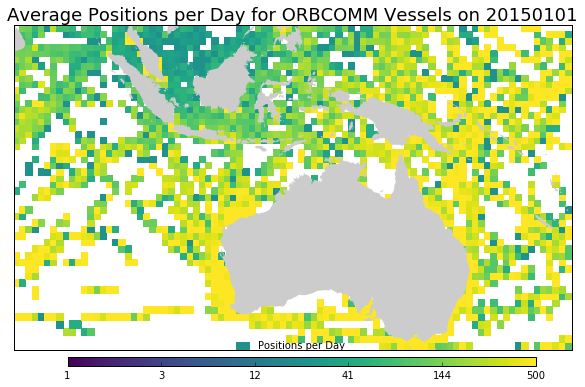

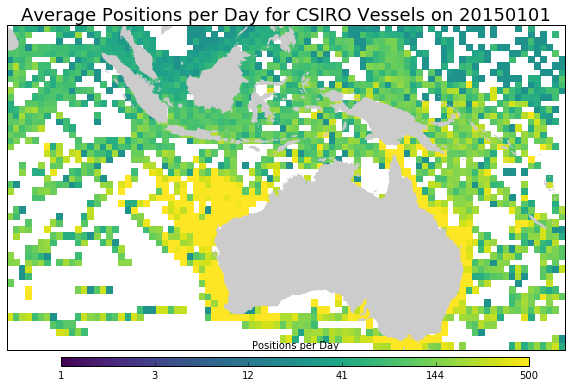

In [70]:
thedates = [20120101, 20120701, 20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

# for thedate in thedates:
#     grid = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos_grid.p', 'rb'))

thedate = 20150101

grid_csiro = np.zeros(shape=(num_lats,num_lons))

with open("ans_01Jan2015.csv","rb") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if 1:#int(row['MMSIcount'])>5:
            lat = int(row['LATBIN'])
            lon = int(row['LONBIN'])
            lat_index = lat-min_lat*one_over_cellsize
            lon_index = lon-min_lon*one_over_cellsize
            numMMSI = int(row['MMSIcount'])
            pings = int(row['COUNT'])
#             print row
#             break
            grid_csiro[lat_index][lon_index] = 24*float(pings)/float(numMMSI) # divides by area in square km           


pos = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos.p', 'rb'))
grid = np.zeros(shape=(num_lats,num_lons))

for row in pos:
    if 1:#int(row[2])> 5:
        lat = int(row[0])
        lon = int(row[1])
        lat_index = lat-min_lat*one_over_cellsize
        lon_index = lon-min_lon*one_over_cellsize
        grid[lat_index][lon_index] = 24*float(row[3])/float(row[2]) # divides by area in square km


makeMap(grid,"Average Positions per Day for ORBCOMM Vessels on "+str(thedate),"Positions per Day",1,500.1, colormap=plt.get_cmap("viridis"))
makeMap(grid_csiro,"Average Positions per Day for CSIRO Vessels on "+str(thedate),"Positions per Day",1,500.1, colormap=plt.get_cmap("viridis"))


In [78]:
newgrid = np.divide(grid,grid_csiro)

for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j]== 0 or grid_csiro[i][j] == 0:
            newgrid[i][j]= 0
        else:
            newgrid[i][j] = (grid[i][j] - grid_csiro[i][j]) / float(grid[i][j])
            

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


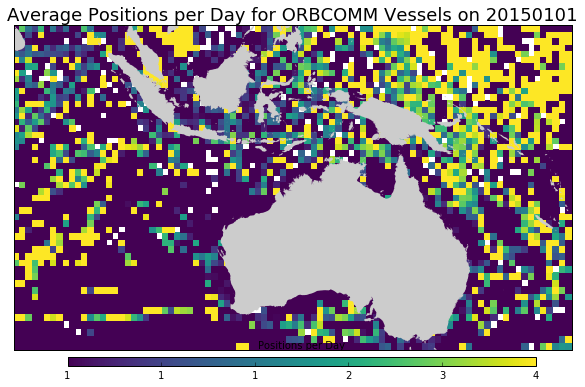

In [79]:
makeMap(np.divide(grid,grid_csiro),"Average Positions per Day for ORBCOMM Vessels on "+str(thedate),
        "Positions per Day",.1,4, colormap=plt.get_cmap("viridis"))

In [85]:
def makeMapLinear(grid,fig_title,bar_title,fig_min_value,fig_max_value,colormap='vidris',
           map_width=10, map_height=6):
    fig = plt.figure(figsize=(map_width,map_height)) 
    
    firstlat = max_lat
    lastlat =  min_lat
    firstlon = min_lon
    lastlon = max_lon
    scale = cellsize

    numlats = int((firstlat-lastlat)/scale+.5)
    numlons = int((lastlon-firstlon)/scale+.5)

    lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
    lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

    extra = 0
    m = Basemap(llcrnrlat=lastlat-extra, urcrnrlat=firstlat+extra,
              llcrnrlon=firstlon-extra, urcrnrlon=lastlon+extra, lat_ts=0, projection='mill',resolution="h")

    m.drawmapboundary()#fill_color='#111111')
    m.fillcontinents('#cccccc',lake_color='#cccccc')#, lake_color, ax, zorder, alpha)

    x = np.linspace(firstlon, lastlon, -(firstlon-lastlon)*one_over_cellsize+1)
    y = np.linspace(lastlat, firstlat, (firstlat-lastlat)*one_over_cellsize+1)
    x, y = np.meshgrid(x, y)
    converted_x, converted_y = m(x, y)

    maximum = fig_max_value # grid.max()
    minimum = fig_min_value #1

#     norm = colors.LogNorm(vmin=minimum, vmax=maximum)
    norm = colors.Normalize(vmin=minimum, vmax=maximum)

    m.pcolormesh(converted_x, converted_y, grid, norm=norm, vmin=minimum, vmax=maximum, cmap = colormap)

    t = fig_title
    plt.title(t, color = "#000000", fontsize=18)

    ax = fig.add_axes([0.2, 0.1, 0.65, 0.02]) #x coordinate , 
#     norm = colors.LogNorm(vmin=minimum, vmax=maximum)
    norm = colors.Normalize(vmin=minimum, vmax=maximum)
#     lvls = np.logspace(np.log10(minimum),np.log10(maximum),num=6)
    cb = colorbar.ColorbarBase(ax,norm = norm, orientation='horizontal', cmap = colormap) # ticks=lvls,

    #cb.ax.set_xticklabels(["0" ,round(m3**.5,1), m3, round(m3**1.5,1), m3*m3,round(m3**2.5,1), str(round(m3**3,1))+"+"], fontsize=10)
    
#     cb.ax.set_xticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
    cb.set_label(bar_title,labelpad=-40, y=0.45, color = "#000000")
    plt.savefig(fig_title+".png",bbox_inches='tight',dpi=300,transparent=True,pad_inches=.1)
    plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


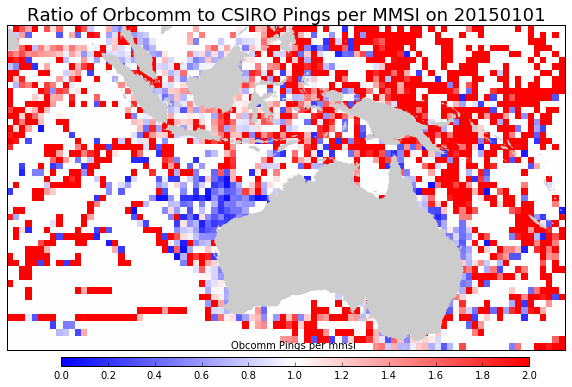

In [87]:
newgrid = np.divide(grid,grid_csiro)

for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j]== 0 or grid_csiro[i][j] == 0:
            newgrid[i][j]= 1
#         else:
#             newgrid[i][j] = (grid[i][j] - grid_csiro[i][j]) / float(grid[i][j])

makeMapLinear(newgrid,"Ratio of Orbcomm to CSIRO Pings per MMSI on "+str(thedate),
        "Obcomm Pings per mmsi ",0,2, colormap=plt.get_cmap("bwr"))

In [92]:
thedates = [20120101, 20120701, 20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

def makeComparison(thedate):

    grid_csiro = np.zeros(shape=(num_lats,num_lons))

    with open("ans"+str(thedate)+".csv","rb") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if 1:#int(row['MMSIcount'])>5:
                lat = int(row['LATBIN'])
                lon = int(row['LONBIN'])
                lat_index = lat-min_lat*one_over_cellsize
                lon_index = lon-min_lon*one_over_cellsize
                numMMSI = int(row['MMSIcount'])
                pings = int(row['COUNT'])
    #             print row
    #             break
                grid_csiro[lat_index][lon_index] = float(pings)/float(numMMSI) # divides by area in square km           


    pos = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos.p', 'rb'))
    grid = np.zeros(shape=(num_lats,num_lons))

    for row in pos:
        if 1:#int(row[2])> 5:
            lat = int(row[0])
            lon = int(row[1])
            lat_index = lat-min_lat*one_over_cellsize
            lon_index = lon-min_lon*one_over_cellsize
            grid[lat_index][lon_index] = float(row[3])/float(row[2]) # divides by area in square km    

        newgrid = np.divide(grid,grid_csiro)

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]== 0 or grid_csiro[i][j] == 0:
                    newgrid[i][j]= 1
        #         else:
        #             newgrid[i][j] = (grid[i][j] - grid_csiro[i][j]) / float(grid[i][j])

    newgrid = np.divide(grid,grid_csiro)

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j]== 0 or grid_csiro[i][j] == 0:
                newgrid[i][j]= 1
        
    makeMapLinear(newgrid,"Ratio of Orbcomm to CSIRO Pings per MMSI on "+str(thedate),
            "Obcomm Pings per mmsi ",0,2, colormap=plt.get_cmap("bwr"))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide


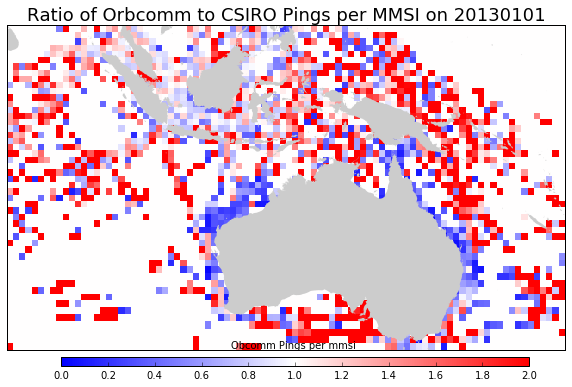

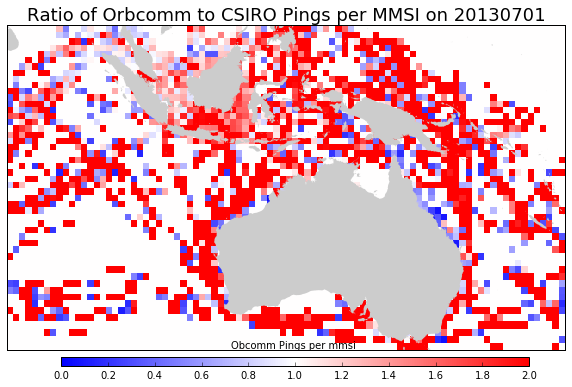

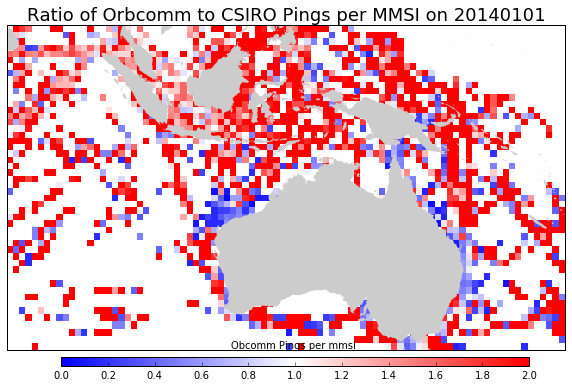

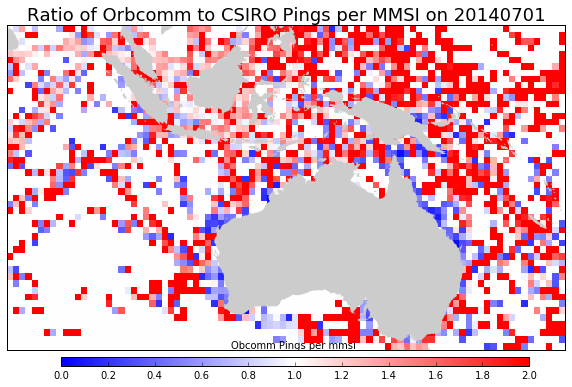

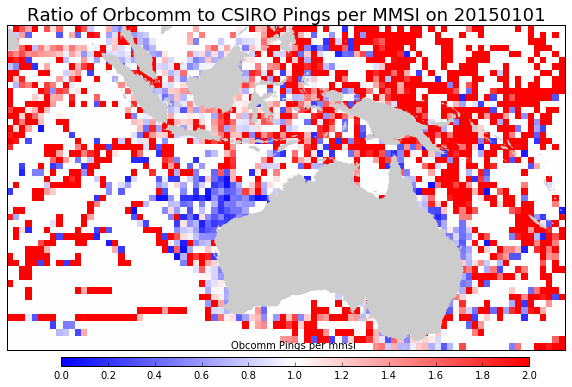

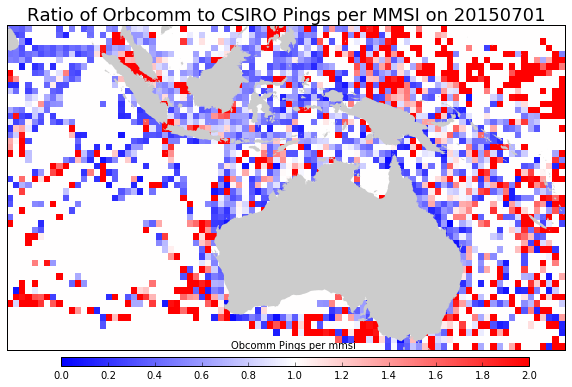

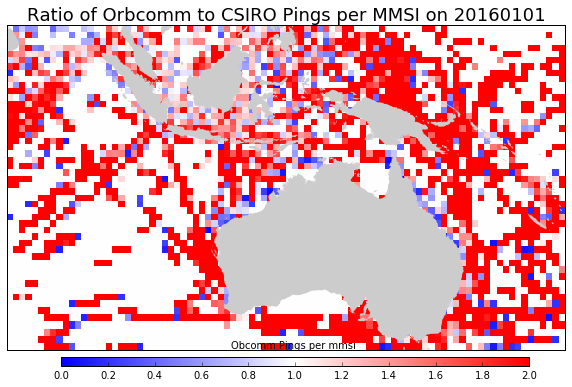

In [93]:
thedates = [20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

for d in thedates:
    makeComparison(d)

In [94]:
thedates = [20120101, 20120701, 20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

def makeComparison2(thedate):

    grid_csiro = np.zeros(shape=(num_lats,num_lons))

    with open("ans"+str(thedate)+".csv","rb") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if 1:#int(row['MMSIcount'])>5:
                lat = int(row['LATBIN'])
                lon = int(row['LONBIN'])
                lat_index = lat-min_lat*one_over_cellsize
                lon_index = lon-min_lon*one_over_cellsize
                numMMSI = int(row['MMSIcount'])
                pings = int(row['COUNT'])
    #             print row
    #             break
                grid_csiro[lat_index][lon_index] = float(numMMSI)     


    pos = cPickle.load(open('../../data/density/'+str(thedate)+'_csiro_region_pos.p', 'rb'))
    grid = np.zeros(shape=(num_lats,num_lons))

    for row in pos:
        if 1:#int(row[2])> 5:
            lat = int(row[0])
            lon = int(row[1])
            lat_index = lat-min_lat*one_over_cellsize
            lon_index = lon-min_lon*one_over_cellsize
            grid[lat_index][lon_index] = float(row[2])     

        newgrid = np.divide(grid,grid_csiro)

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]== 0 or grid_csiro[i][j] == 0:
                    newgrid[i][j]= 1
        #         else:
        #             newgrid[i][j] = (grid[i][j] - grid_csiro[i][j]) / float(grid[i][j])

    newgrid = np.divide(grid,grid_csiro)

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j]== 0 or grid_csiro[i][j] == 0:
                newgrid[i][j]= 1
        
    makeMapLinear(newgrid,"Ratio of Orbcomm to CSIRO Pings per MMSI on "+str(thedate),
            "Obcomm Pings per mmsi ",0,2, colormap=plt.get_cmap("bwr"))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide


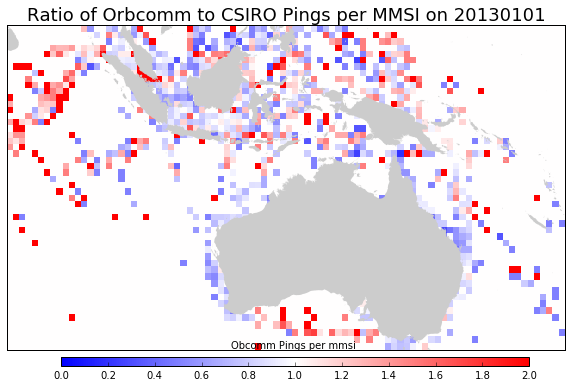

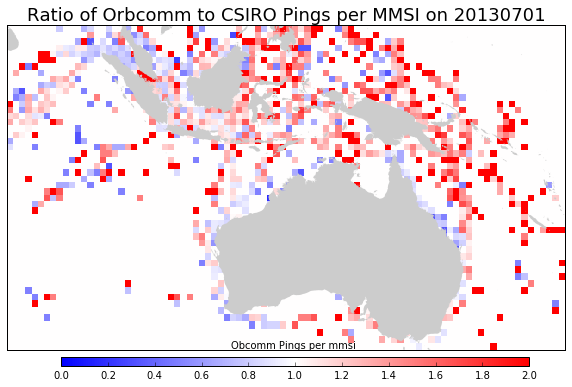

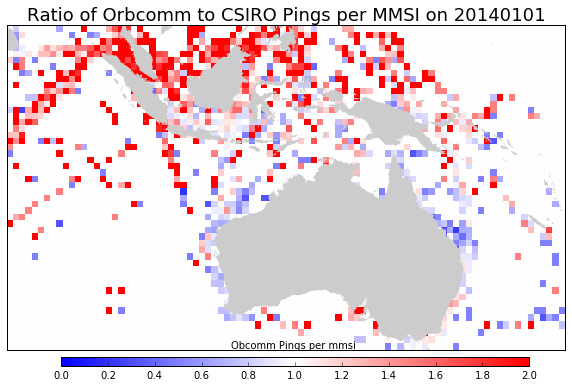

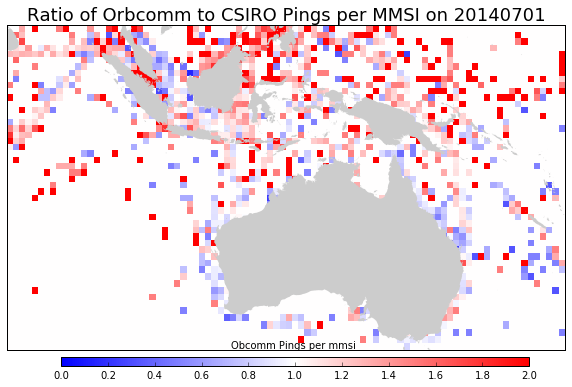

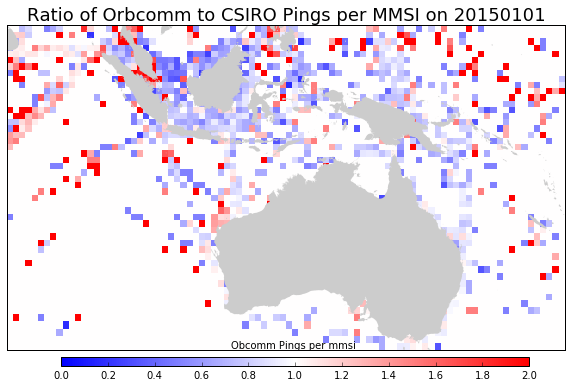

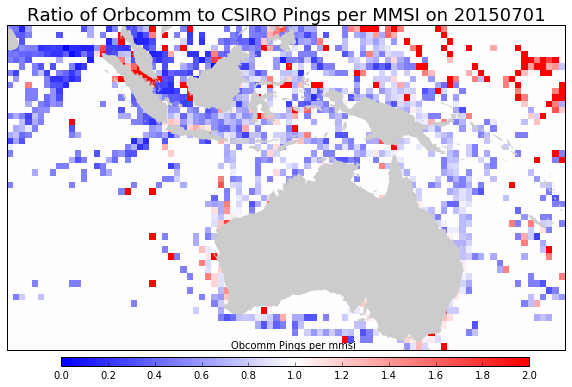

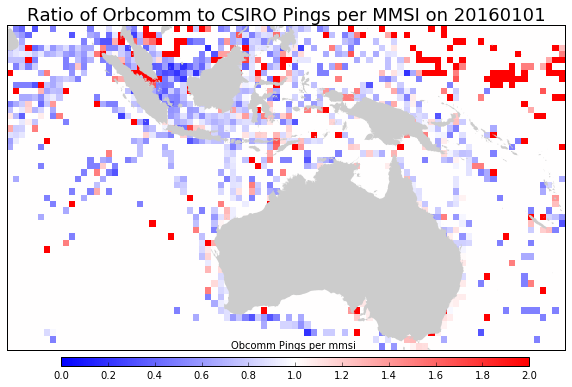

In [95]:
thedates = [20130101, 20130701, 20140101, 20140701, 20150101, 20150701, 20160101]

for d in thedates:
    makeComparison2(d)